## Computer Vision 2nd Assignment
## Melika Heydari Rad 
#### Maktabkhooneh Course 

___

همان‌گونه که در ویدیو رنگ آبی فیلتر و روی درب بطری تست شد، با دستور   
inrange   
همین کار را برای رنگ دیگر تغییر داده و روی یک ویدیو با شئ دلخواه خودتان تست کنید



<div style="background-color: #cce5ff; padding: 10px;">
در این فایل دوم، دایره کشیدن و مستطیل کشیدن به دور آبجکت در انتهای فایل اضافه شده است
</div>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

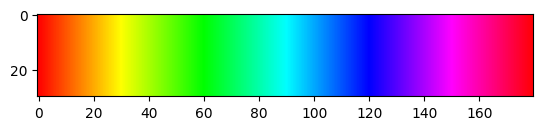

In [2]:
# having hsv map

hue_spectrum = np.linspace(0, 179, dtype='uint8', num=180)
img = np.array([hue_spectrum]*30)
saturation_channel = np.ones_like(img, dtype='uint8')*255
value_channel = np.ones_like(img, dtype='uint8')*255

hsv = cv2.merge([img, saturation_channel, value_channel])
final_bgr_spectrum = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

plt.imshow(final_bgr_spectrum[...,::-1])

In [3]:
# getting approximate hsv color of the object

import numpy as np
import cv2

# a part of object in RGB is:
red = np.array([[[157,6,18]]], 'uint8')

# getting hsv equivalent
hsv_red = cv2.cvtColor(red,cv2.COLOR_RGB2HSV)
print(hsv_red)

# now we use hsv values around this :

[[[178 245 157]]]


### with first video 

In [5]:
import cv2
import numpy as np

cap = cv2.VideoCapture("20230816_160514_cropped.mp4")

while True:
    ret, frame = cap.read()
    if not ret:
        break
        
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    
    # lower mask (0-10)
    lower_red = np.array([0,245,100])
    upper_red = np.array([10,255,255])
    mask0 = cv2.inRange(hsv, lower_red, upper_red)

    # upper mask (170-180)
    lower_red = np.array([160,245,100])
    upper_red = np.array([179,255,255])
    mask1 = cv2.inRange(hsv, lower_red, upper_red)

    # join masks
    mask = mask0+mask1
    
    # making a better mask 
    kernel = np.ones((10,10), np.uint8)
    opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel) 
    closing = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    
    
    filtered = cv2.bitwise_and(frame, frame, mask=mask)
    
    # resizing :
    frame = cv2.resize(frame, (450, 450))
    mask = cv2.resize(mask, (450, 450))
    filtered = cv2.resize(filtered, (450, 450))
    
    
    # showing
    cv2.imshow('image',frame)
    cv2.imshow('filtered',filtered)
    cv2.imshow('mask', mask)
    
    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break
        
cv2.destroyAllWindows()
cap.release()

Text(0.5, 1.0, 'filtered')

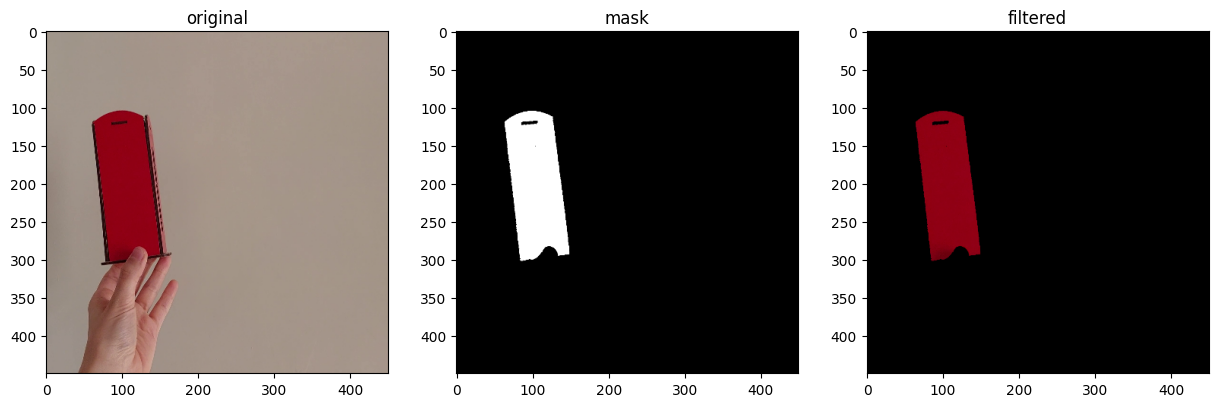

In [5]:
plt.figure(figsize=(15,10))

plt.subplot(131); plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)); plt.title('original')
plt.subplot(132); plt.imshow(mask, cmap='gray'); plt.title('mask')
plt.subplot(133); plt.imshow(cv2.cvtColor(filtered, cv2.COLOR_BGR2RGB)); plt.title('filtered')

### with second video 

In [10]:
import cv2
import numpy as np

cap = cv2.VideoCapture("20230816_150919.mp4")

while True:
    ret, frame = cap.read()
    if not ret:
        break
        
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    
    # lower mask (0-10)
    lower_red = np.array([0,200,100])
    upper_red = np.array([20,255,255])
    mask0 = cv2.inRange(hsv, lower_red, upper_red)

    # upper mask (170-180)
    lower_red = np.array([150,200,100])
    upper_red = np.array([179,255,255])
    mask1 = cv2.inRange(hsv, lower_red, upper_red)

    # join masks
    mask = mask0+mask1
    
    # making a better mask 
    kernel = np.ones((10,10), np.uint8)
    opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel) 
    closing = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    
    
    filtered = cv2.bitwise_and(frame, frame, mask=mask)
    
    # resizing :
    
    filtered = cv2.resize(filtered, (270, 480))
    mask = cv2.resize(mask, (270, 480))
    frame = cv2.resize(frame, (270, 480))
    
    
    # showing
    cv2.imshow('image',frame)
    cv2.imshow('mask',mask)
    cv2.imshow('filtered',filtered)
    
    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break
        
cv2.destroyAllWindows()
cap.release()

Text(0.5, 1.0, 'filtered')

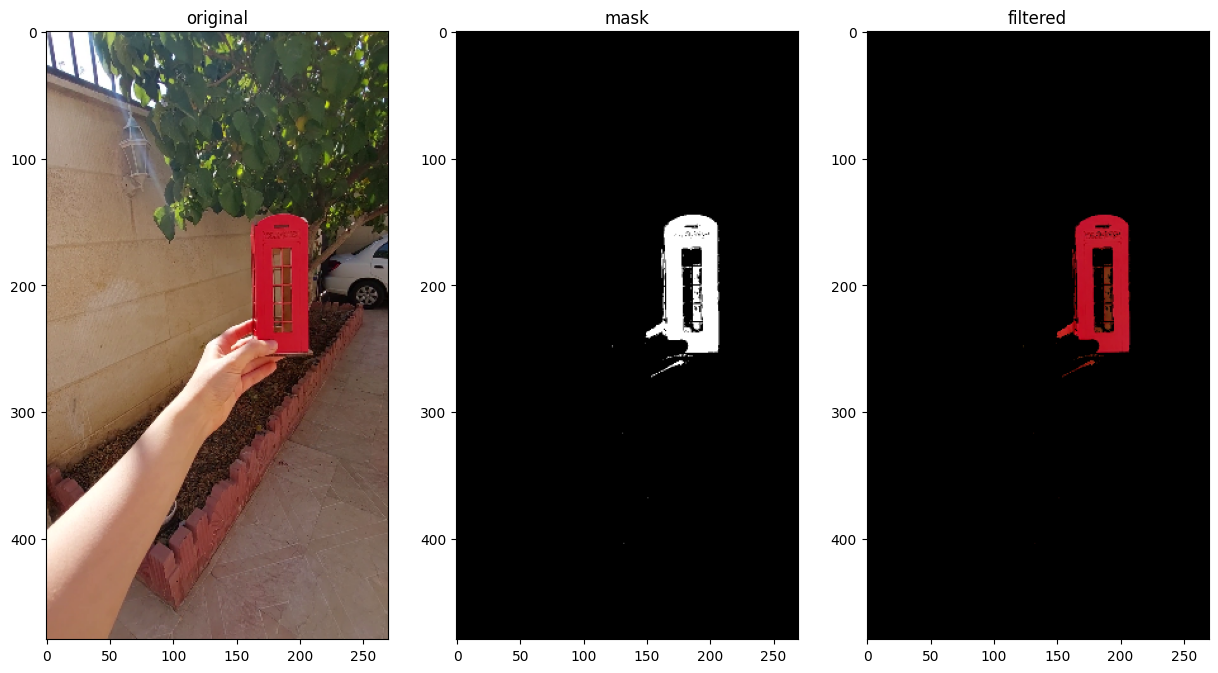

In [11]:
plt.figure(figsize=(15,10))

plt.subplot(131); plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)); plt.title('original')
plt.subplot(132); plt.imshow(mask, cmap='gray'); plt.title('mask')
plt.subplot(133); plt.imshow(cv2.cvtColor(filtered, cv2.COLOR_BGR2RGB)); plt.title('filtered')

### drawing shapes around the object :

برای این کار، ماسک را بلر میکنیم تا نویز ها به راحتی با مورفولوژی از بین بروند و کانتور اضافه ایجاد نکنند

#### circle

In [6]:
import cv2
import numpy as np

cap = cv2.VideoCapture("20230816_160514_cropped.mp4")

while True:
    ret, frame = cap.read()
    if not ret:
        break
        
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    
    # lower mask (0-10)
    lower_red = np.array([0,245,100])
    upper_red = np.array([10,255,255])
    mask0 = cv2.inRange(hsv, lower_red, upper_red)

    # upper mask (170-180)
    lower_red = np.array([160,245,100])
    upper_red = np.array([179,255,255])
    mask1 = cv2.inRange(hsv, lower_red, upper_red)

    # join masks
    mask = mask0+mask1
    
    
    
    # making a better mask 
    
    mask = cv2.GaussianBlur(mask, (13,13), 0)
    
    kernel = np.ones((10,10), np.uint8)
    opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel) 
    closing = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    
    
    filtered = cv2.bitwise_and(frame, frame, mask=mask)
    
    contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    if len(contours) !=0:
        centers, radius = cv2.minEnclosingCircle(contours[0])
        centers = int(centers[0]), int(centers[1])
        radius = int(radius)
        cv2.circle(frame, centers, radius, (0,255,255), 10)
    
    
    # resizing :
    frame = cv2.resize(frame, (450, 450))
    mask = cv2.resize(mask, (450, 450))
    filtered = cv2.resize(filtered, (450, 450))
    
    
    # showing
    cv2.imshow('image',frame)
    cv2.imshow('filtered',filtered)
    cv2.imshow('mask', mask)
    
    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break
        
cv2.destroyAllWindows()
cap.release()

Text(0.5, 1.0, 'filtered')

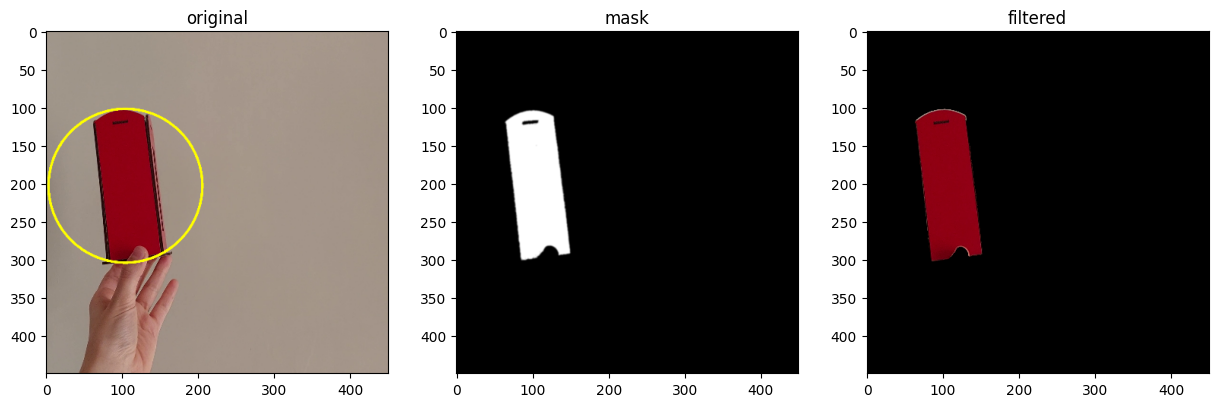

In [34]:
plt.figure(figsize=(15,10))

plt.subplot(131); plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)); plt.title('original')
plt.subplot(132); plt.imshow(mask, cmap='gray'); plt.title('mask')
plt.subplot(133); plt.imshow(cv2.cvtColor(filtered, cv2.COLOR_BGR2RGB)); plt.title('filtered')

#### rectangle 

In [8]:
import cv2
import numpy as np

cap = cv2.VideoCapture("20230816_160514_cropped.mp4")

while True:
    ret, frame = cap.read()
    if not ret:
        break
        
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    
    # lower mask (0-10)
    lower_red = np.array([0,245,100])
    upper_red = np.array([10,255,255])
    mask0 = cv2.inRange(hsv, lower_red, upper_red)

    # upper mask (170-180)
    lower_red = np.array([160,245,100])
    upper_red = np.array([179,255,255])
    mask1 = cv2.inRange(hsv, lower_red, upper_red)

    # join masks
    mask = mask0+mask1
    
    
    
    # making a better mask 
    
    mask = cv2.GaussianBlur(mask, (13,13), 0)
    
    kernel = np.ones((10,10), np.uint8)
    opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel) 
    closing = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    
    
    filtered = cv2.bitwise_and(frame, frame, mask=mask)
    
    contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    if len(contours) !=0:
        x, y, w, h = cv2.boundingRect(contours[0])
        cv2.rectangle(frame, (x-30, y-30), (x+w+30, y+h+30), (0,255,255), 10) # giving 30 more space for the object to be more vidible

    
    
    # resizing :
    frame = cv2.resize(frame, (450, 450))
    mask = cv2.resize(mask, (450, 450))
    filtered = cv2.resize(filtered, (450, 450))
    
    
    # showing
    cv2.imshow('image',frame)
    cv2.imshow('filtered',filtered)
    cv2.imshow('mask', mask)
    
    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break
        
cv2.destroyAllWindows()
cap.release()

Text(0.5, 1.0, 'filtered')

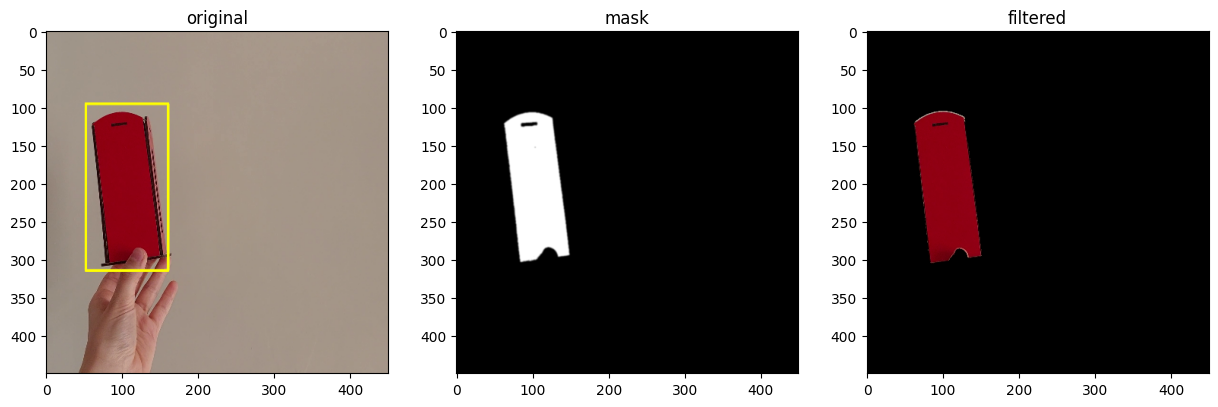

In [31]:
plt.figure(figsize=(15,10))

plt.subplot(131); plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)); plt.title('original')
plt.subplot(132); plt.imshow(mask, cmap='gray'); plt.title('mask')
plt.subplot(133); plt.imshow(cv2.cvtColor(filtered, cv2.COLOR_BGR2RGB)); plt.title('filtered')